<a href="https://colab.research.google.com/github/lakshayknows/credit-score-classification/blob/main/credit_score_classification_using_ML_and_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
parisrohan_credit_score_classification_path = kagglehub.dataset_download('parisrohan/credit-score-classification')

print('Data source import complete.')


Data source import complete.


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Analysing and Exploration

In [10]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

<ipython-input-10-a1da497a12f5>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/train.csv')


In [11]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [12]:
train.shape

(100000, 28)

In [13]:
test.shape

(50000, 27)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [15]:
train.drop(columns=['ID','Customer_ID'],inplace=True)
test.drop(columns=['ID','Customer_ID'],inplace=True)

In [16]:
null_train = train.isna().sum()

In [17]:
null_test = test.isna().sum()

<Axes: >

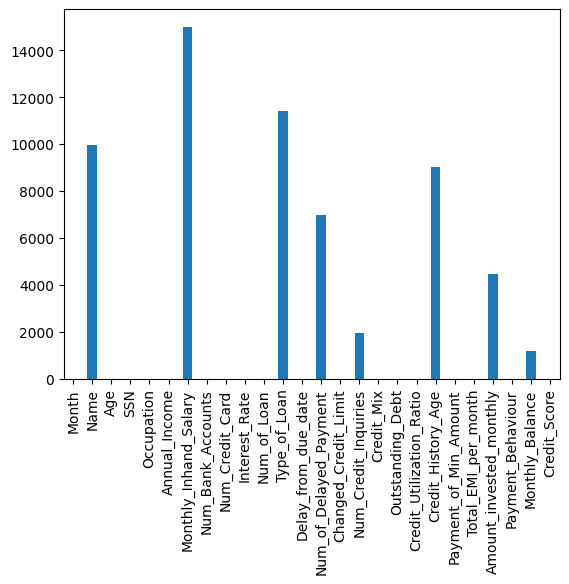

In [18]:
null_train.plot(kind='bar')

<Axes: >

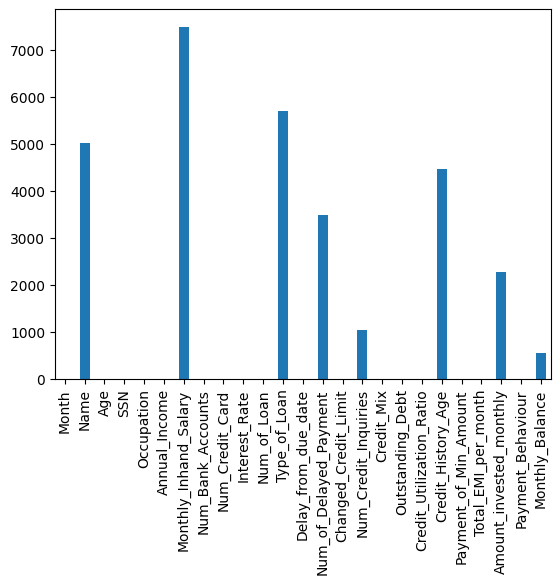

In [19]:
null_test.plot(kind='bar')

In [20]:
train.duplicated().sum()

np.int64(0)

In [21]:
test.duplicated().sum()

np.int64(0)

In [22]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [23]:
test.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


* Correcting the dtypes

In [24]:
columns_to_convert = [
    "Annual_Income",
    "Changed_Credit_Limit",
    "Outstanding_Debt",
    "Amount_invested_monthly",
    "Monthly_Balance"
]

# Replace non-numeric characters and empty strings with NaN, then convert to float
train[columns_to_convert] = (
    train[columns_to_convert]
    .replace('[^\d.]', '', regex=True)  # Remove unwanted characters
    .replace('', np.nan)  # Replace empty strings with NaN
    .astype(float)  # Convert to float
)


In [25]:
columns_to_convert = [
    "Annual_Income",
    "Changed_Credit_Limit",
    "Outstanding_Debt",
    "Amount_invested_monthly",
    "Monthly_Balance"
]

# Replace non-numeric characters and empty strings with NaN, then convert to float
test[columns_to_convert] = (
    test[columns_to_convert]
    .replace('[^\d.]', '', regex=True)  # Remove unwanted characters
    .replace('', np.nan)  # Replace empty strings with NaN
    .astype(float)  # Convert to float
)


In [26]:
columns_to_convert = ["Age", "Num_of_Loan", "Num_of_Delayed_Payment"]

# Convert to numeric, forcing errors to NaN if conversion fails
train[columns_to_convert] = train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [27]:
columns_to_convert = ["Age", "Num_of_Loan", "Num_of_Delayed_Payment"]

# Convert to numeric, forcing errors to NaN if conversion fails
test[columns_to_convert] = test[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [28]:
num_train = train.select_dtypes(include=['number','float'])
cat_train = train.select_dtypes(include=['object'])

In [29]:
num_test = test.select_dtypes(include=['number','float'])
cat_test = test.select_dtypes(include=['object'])

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Visualising Data

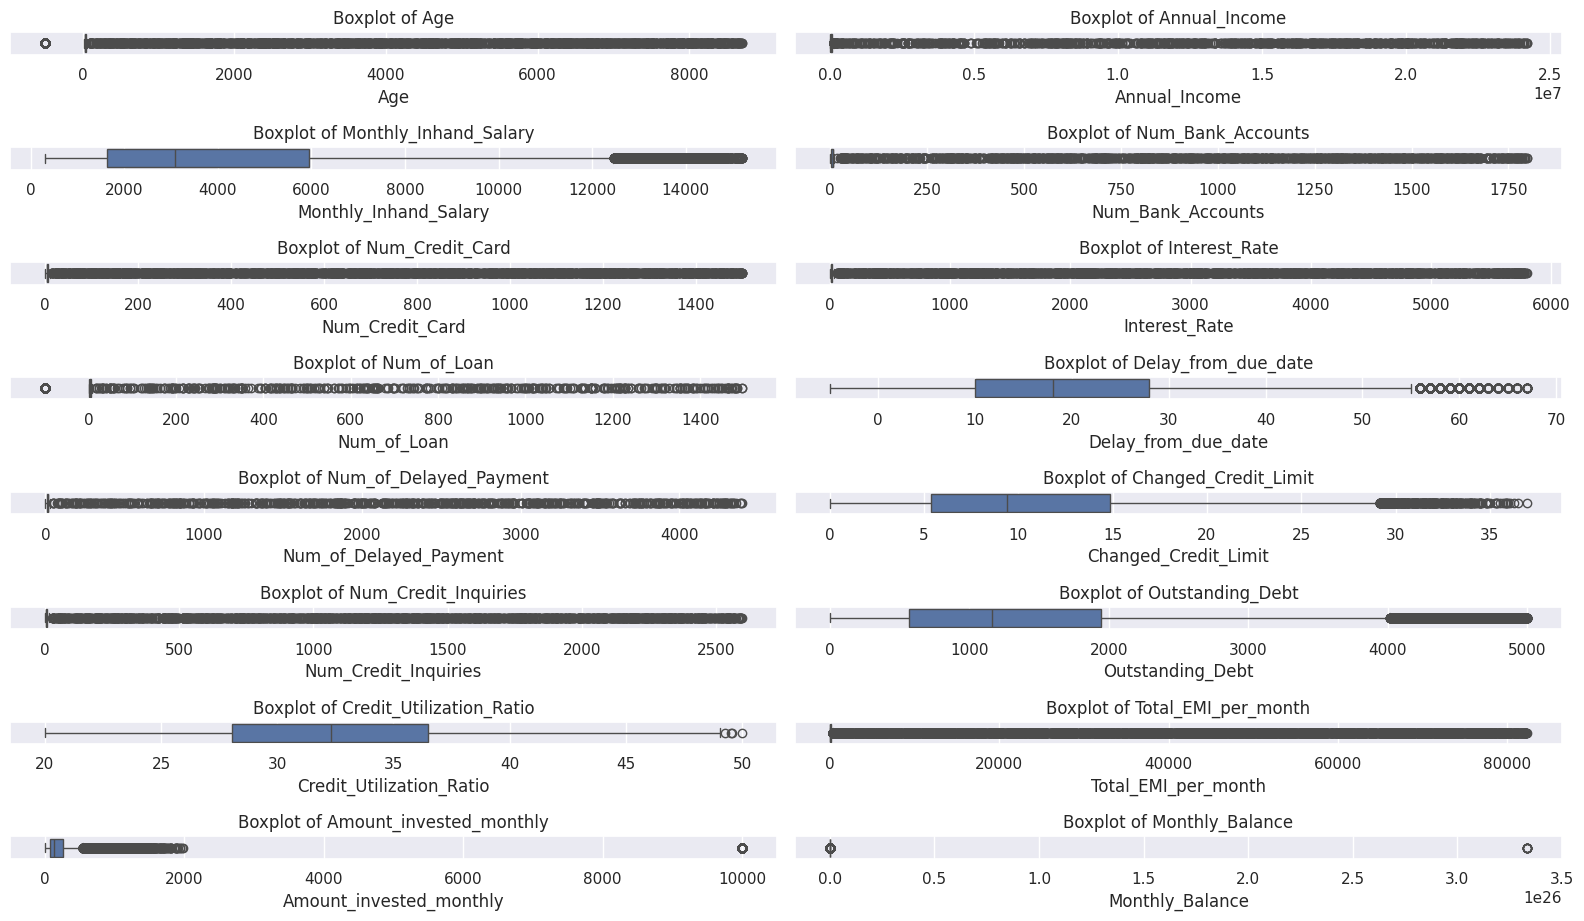

In [31]:
# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(num_train.columns):
    plt.subplot(len(num_train.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=train[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

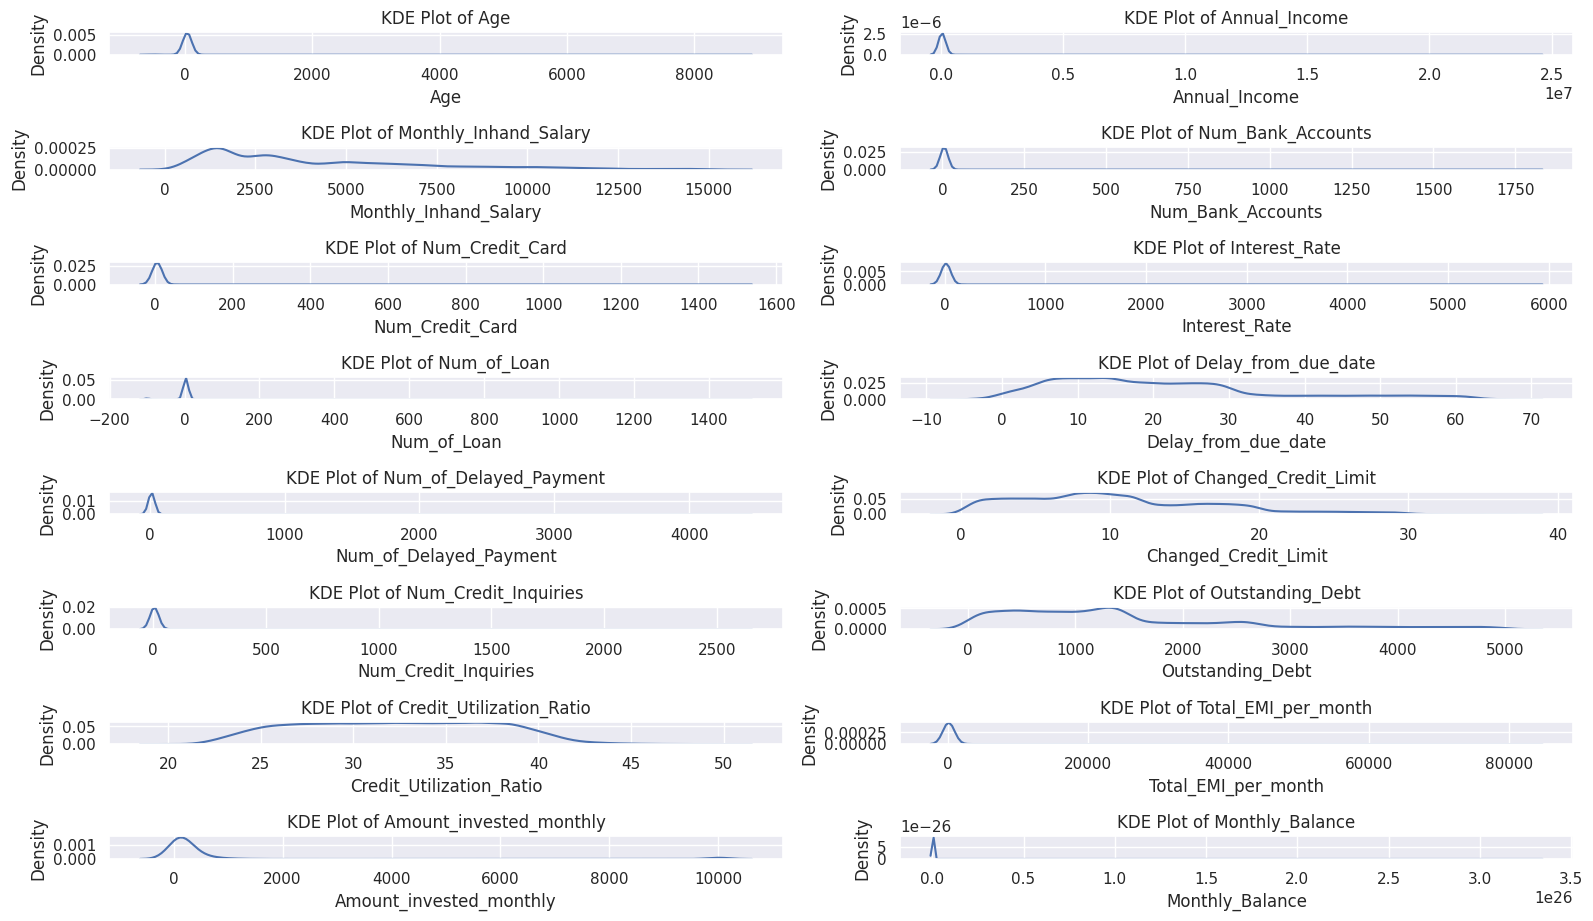

In [32]:
# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(num_train.columns):
    plt.subplot(len(num_train.columns)//2 + 1, 2, i + 1)
    sns.kdeplot(x=train[column])
    plt.title(f'KDE Plot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

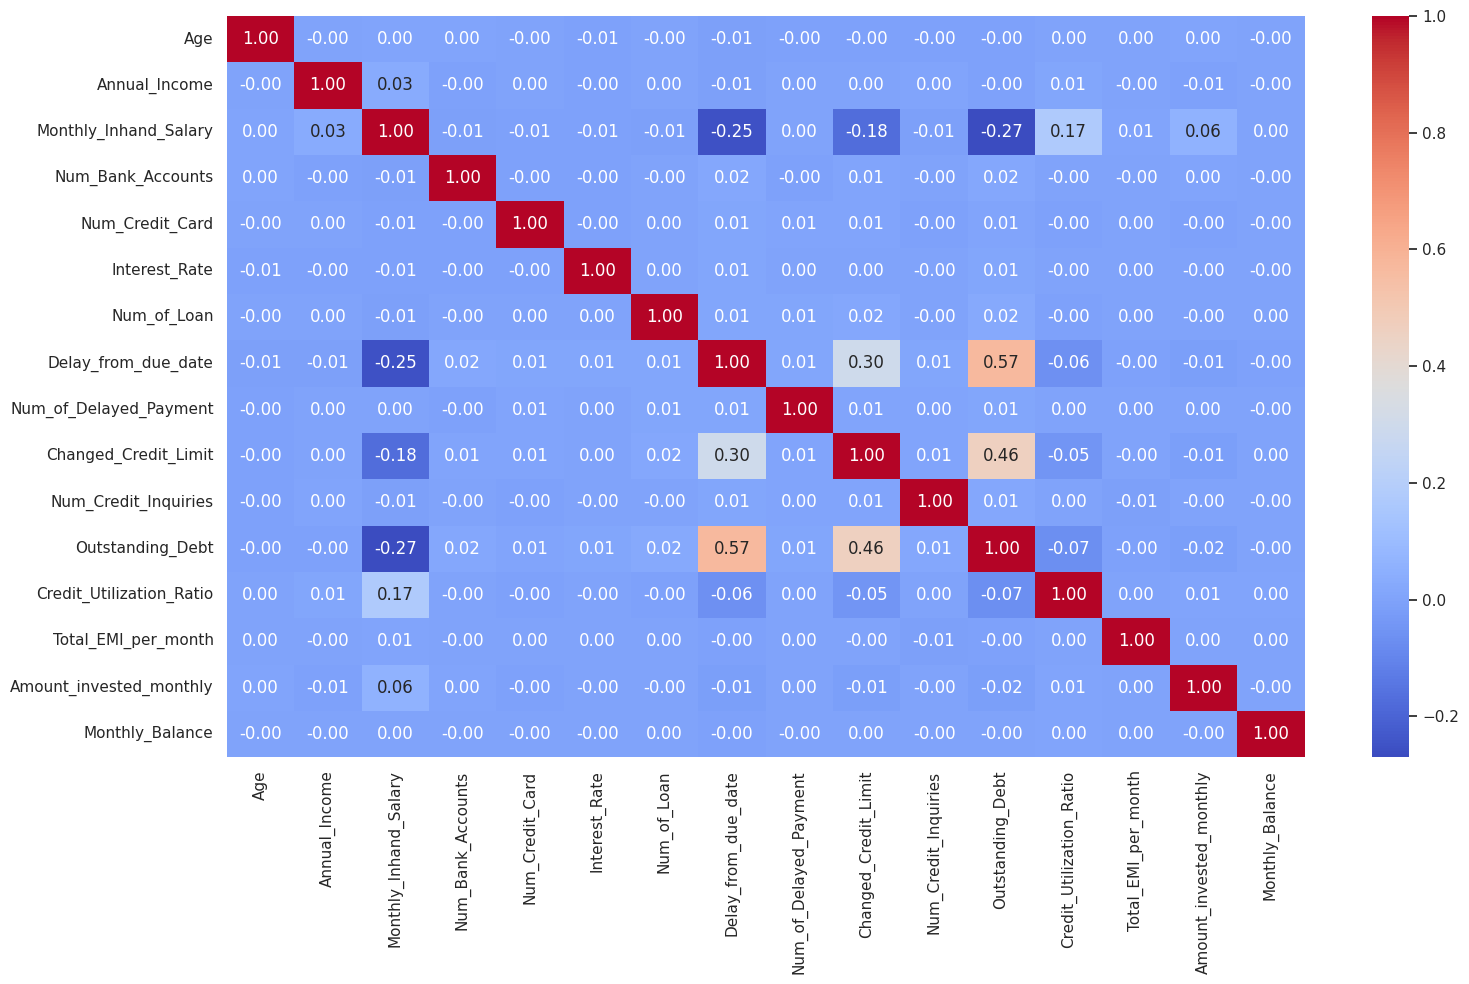

In [33]:
plt.figure(figsize=(16, 10))
sns.heatmap(num_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [34]:
num_train.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,-0.000193,0.003260,0.003126,-0.001829,-0.006817,-0.000187,-0.009993,-0.002622,-0.002847,-0.003336,-0.002706,0.002757,0.000125,0.004070,-0.001078
Annual_Income,-0.000193,1.000000,0.030519,-0.004627,0.001250,-0.002908,0.001890,-0.010631,0.001366,0.000726,0.003153,-0.003706,0.010316,-0.000248,-0.005318,-0.000818
Monthly_Inhand_Salary,0.003260,0.030519,1.000000,-0.010819,-0.005049,-0.006422,-0.011125,-0.250100,0.000676,-0.175354,-0.008867,-0.269727,0.173192,0.007264,0.061485,0.000806
Num_Bank_Accounts,0.003126,-0.004627,-0.010819,1.000000,-0.002216,-0.003998,-0.000372,0.015966,-0.003533,0.007825,-0.001683,0.015548,-0.001365,-0.001433,0.003233,-0.001065
Num_Credit_Card,-0.001829,0.001250,-0.005049,-0.002216,1.000000,-0.004012,0.001928,0.008715,0.005159,0.005240,-0.003479,0.005626,-0.003341,0.000768,-0.002072,-0.001276
Interest_Rate,-0.006817,-0.002908,-0.006422,-0.003998,-0.004012,1.000000,0.001064,0.009792,0.001266,0.000955,-0.001681,0.010721,-0.000359,0.002517,-0.001203,-0.001256
Num_of_Loan,-0.000187,0.001890,-0.011125,-0.000372,0.001928,0.001064,1.000000,0.012174,0.008193,0.016279,-0.000198,0.023785,-0.003765,0.001386,-0.000107,0.000070
Delay_from_due_date,-0.009993,-0.010631,-0.250100,0.015966,0.008715,0.009792,0.012174,1.000000,0.012270,0.296801,0.011508,0.571713,-0.063796,-0.003889,-0.012557,-0.004454
Num_of_Delayed_Payment,-0.002622,0.001366,0.000676,-0.003533,0.005159,0.001266,0.008193,0.012270,1.000000,0.007634,0.003137,0.009938,0.001330,0.001406,0.001094,-0.000946
Changed_Credit_Limit,-0.002847,0.000726,-0.175354,0.007825,0.005240,0.000955,0.016279,0.296801,0.007634,1.000000,0.007308,0.464011,-0.048711,-0.001859,-0.011825,0.002111


In [35]:
cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Month                  100000 non-null  object
 1   Name                   90015 non-null   object
 2   SSN                    100000 non-null  object
 3   Occupation             100000 non-null  object
 4   Type_of_Loan           88592 non-null   object
 5   Credit_Mix             100000 non-null  object
 6   Credit_History_Age     90970 non-null   object
 7   Payment_of_Min_Amount  100000 non-null  object
 8   Payment_Behaviour      100000 non-null  object
 9   Credit_Score           100000 non-null  object
dtypes: object(10)
memory usage: 7.6+ MB


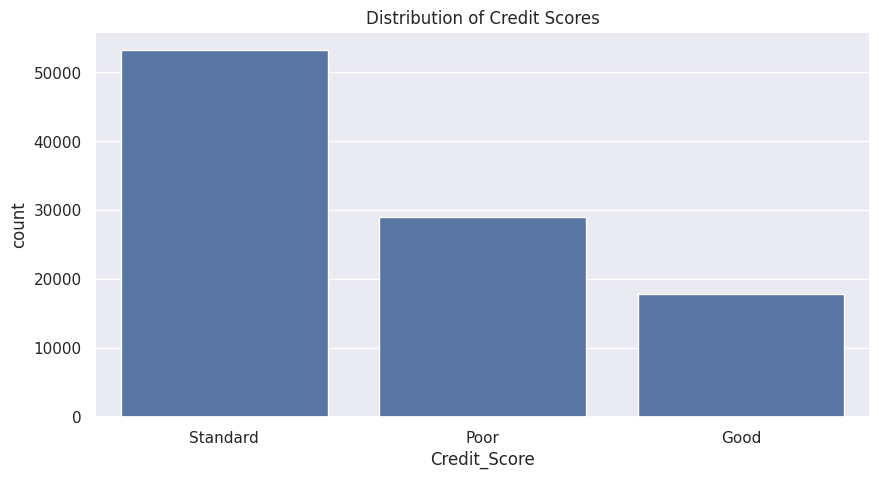

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x=cat_train['Credit_Score'], order=cat_train['Credit_Score'].value_counts().index)
plt.title("Distribution of Credit Scores")
plt.show()

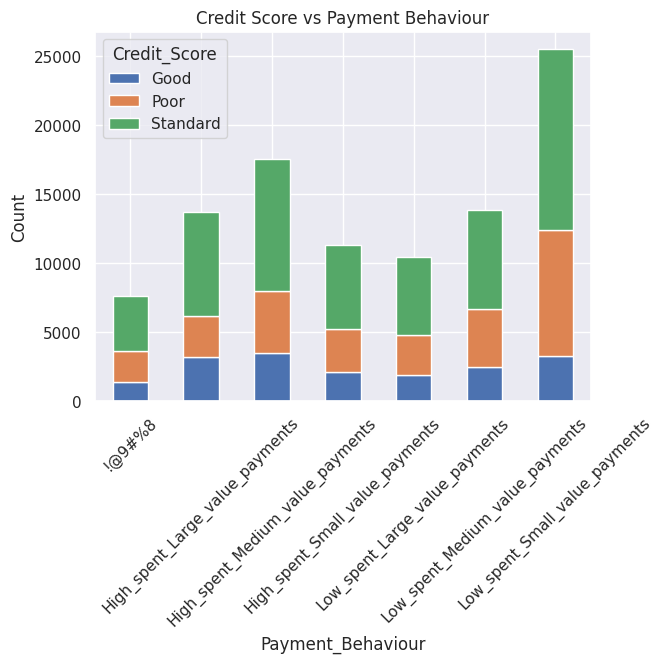

In [37]:
pd.crosstab(cat_train['Payment_Behaviour'], cat_train['Credit_Score']).plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Credit Score vs Payment Behaviour")
plt.show()


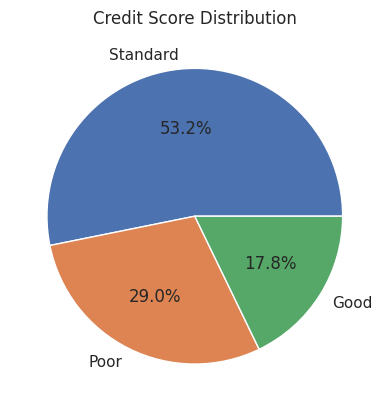

In [38]:
cat_train['Credit_Score'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title("Credit Score Distribution")
plt.show()


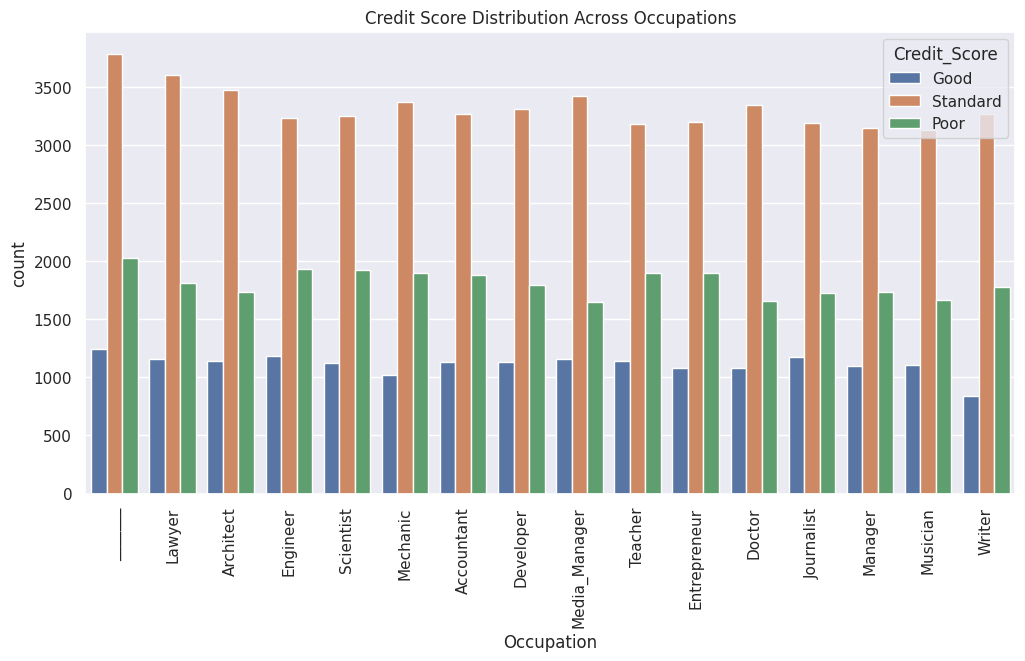

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=cat_train, x='Occupation', hue='Credit_Score', order=cat_train['Occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Credit Score Distribution Across Occupations")
plt.show()


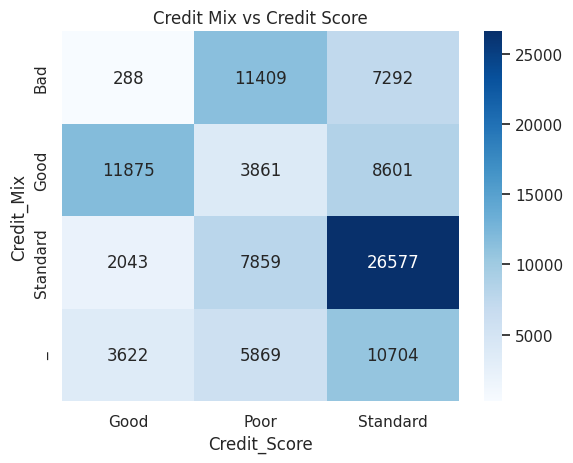

In [40]:
cross_tab = pd.crosstab(cat_train['Credit_Mix'], cat_train['Credit_Score'])
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title("Credit Mix vs Credit Score")
plt.show()


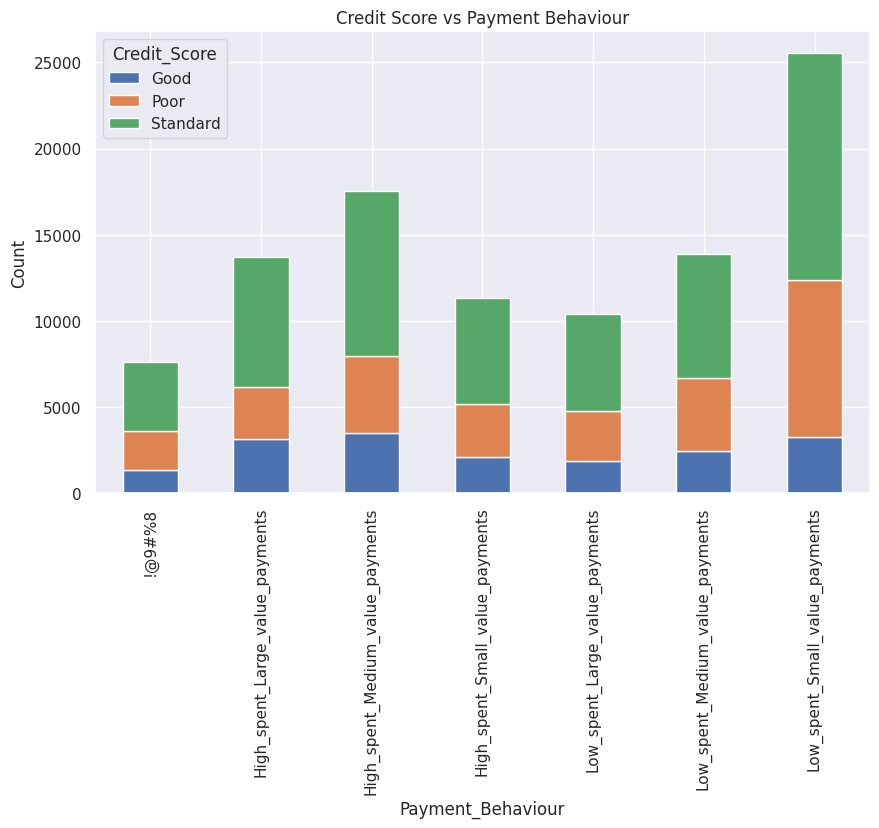

In [41]:
pd.crosstab(cat_train['Payment_Behaviour'], cat_train['Credit_Score']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(rotation=90)
plt.title("Credit Score vs Payment Behaviour")
plt.ylabel("Count")
plt.show()


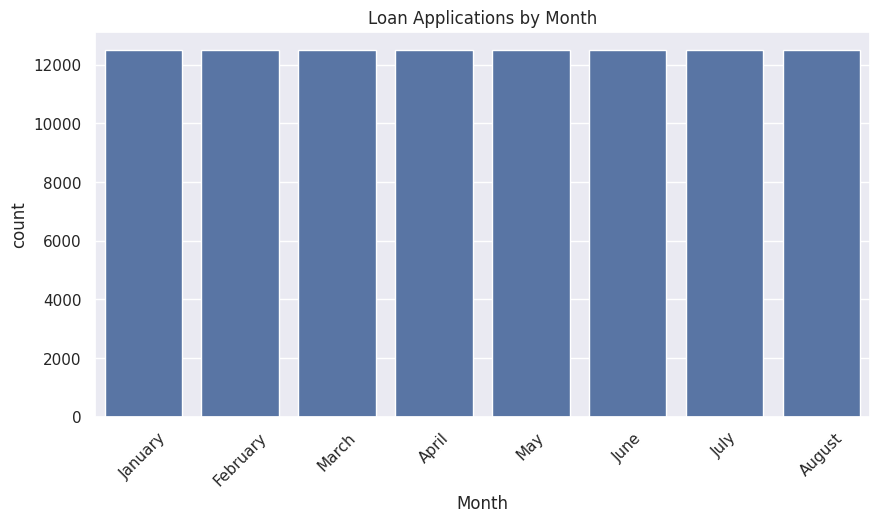

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x=cat_train['Month'], order=cat_train['Month'].value_counts().index)
plt.title("Loan Applications by Month")
plt.xticks(rotation=45)
plt.show()


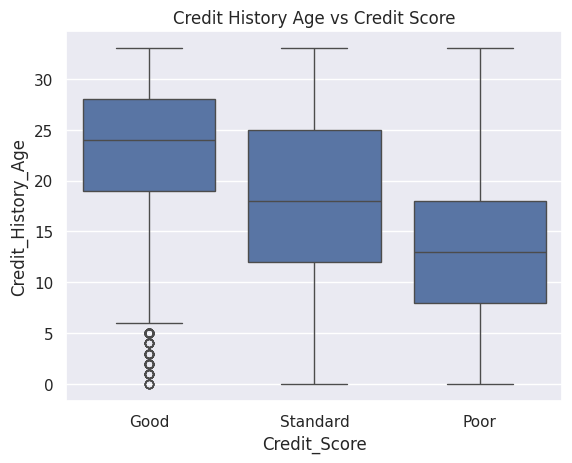

In [43]:
cat_train['Credit_History_Age'] = cat_train['Credit_History_Age'].str.extract('(\d+)').astype(float)  # Extract numeric part
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=cat_train)
plt.title("Credit History Age vs Credit Score")
plt.show()


# Capping the Outliers

In [44]:
train_capped = train.copy()

for i in num_train:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # Ensure logical lower bounds
    if i in ['Age']:
        lower_limit = max(lower_limit, 18)  # Age should be at least 18

    elif i in ['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
        lower_limit = max(lower_limit, 0)  # These should not be negative

    elif i in ['Outstanding_Debt', 'Amount_invested_monthly', 'Total_EMI_per_month', 'Monthly_Balance']:
        lower_limit = max(lower_limit, 0)  # These should be non-negative

    # Cap the values
    train_capped[i] = np.where(
        train_capped[i] > upper_limit, upper_limit,
        np.where(train_capped[i] < lower_limit, lower_limit, train_capped[i])
    )


In [45]:
train_capped

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,Aaron Maashoh,18.0,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,38.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [46]:
train_capped.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.000000,100000.000000,84998.000000,100000.000000,100000.000000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,98800.000000
mean,33.989470,51253.260728,4167.185807,5.468200,5.668825,15.008950,3.425353,20.896640,13.475608,10.455692,5.986770,1399.859920,32.285156,108.054040,197.245774,388.387616
std,11.577356,38684.905644,3105.074259,2.719004,2.229002,9.263065,2.544900,14.427226,6.464739,6.640293,4.138214,1086.193704,5.116818,104.531770,164.570386,175.231122
min,18.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,19457.500000,1625.568229,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.350000,3.000000,566.072500,28.052567,30.306660,74.534002,270.114473
50%,33.000000,37578.610000,3093.745000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,336.742315
75%,42.000000,72790.920000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,470.332133
max,69.000000,152791.050000,12455.268490,13.000000,11.500000,38.000000,11.000000,55.000000,31.500000,29.150000,18.000000,4015.797500,49.162808,357.600632,552.528330,770.658623


In [47]:
test_capped = test.copy()

for i in num_test:
    Q1 = test[i].quantile(0.25)
    Q3 = test[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # Ensure logical lower bounds
    if i in ['Age']:
        lower_limit = max(lower_limit, 18)  # Age should be at least 18

    elif i in ['Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']:
        lower_limit = max(lower_limit, 0)  # These should not be negative

    elif i in ['Outstanding_Debt', 'Amount_invested_monthly', 'Total_EMI_per_month', 'Monthly_Balance']:
        lower_limit = max(lower_limit, 0)  # These should be non-negative

    # Cap the values
    test_capped[i] = np.where(
        test_capped[i] > upper_limit, upper_limit,
        np.where(test_capped[i] < lower_limit, lower_limit, test_capped[i])
    )


In [48]:
test_capped

,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,19.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,October,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,November,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,December,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,September,Rick Rothackerj,28.0,004-07-5839,_______,34847.84,3037.986667,2.0,4.0,6.0,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,December,Sarah McBridec,70.0,031-35-0942,Architect,20002.88,1929.906667,10.0,8.0,29.0,...,12.0,_,3571.70,34.780553,NaN,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570
49996,September,Nicks,25.0,078-73-5990,Mechanic,39628.99,NaN,4.0,6.0,7.0,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.394562
49997,October,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,555.436664,Low_spent_Large_value_payments,349.726332
49998,November,Nicks,25.0,078-73-5990,Mechanic,39628.99,NaN,4.0,6.0,7.0,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981


# Data Cleaning and Imputation

In [49]:
train_capped.drop(columns=['Name','SSN'],inplace=True)


In [50]:
test_capped.drop(columns=['Name','SSN'],inplace=True)

In [51]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder , LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

## Imputation 1 - Random Imputation ( for categorical columns only)

In [52]:
knn = KNNImputer(n_neighbors=20)

In [53]:
def random_impute(series):
    non_na_values = series.dropna().values  # Get existing categories
    return series.apply(lambda x: np.random.choice(non_na_values) if pd.isna(x) else x)

In [54]:
train_capped.select_dtypes(include='object').isna().sum()

,0
Month,0
Occupation,0
Type_of_Loan,11408
Credit_Mix,0
Credit_History_Age,9030
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0


In [55]:
train_capped['Type_of_Loan'] = random_impute(train_capped['Type_of_Loan'])

In [56]:
train_capped['Credit_History_Age'] = random_impute(train_capped['Credit_History_Age'])

In [57]:
train_capped.select_dtypes(include='object').isna().sum()

,0
Month,0
Occupation,0
Type_of_Loan,0
Credit_Mix,0
Credit_History_Age,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0


In [58]:
train_capped.isna().sum()

,0
Month,0
Age,4939
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,4785
Type_of_Loan,0


In [59]:
test_capped.select_dtypes(include='object').isna().sum()

,0
Month,0
Occupation,0
Type_of_Loan,5704
Credit_Mix,0
Credit_History_Age,4470
Payment_of_Min_Amount,0
Payment_Behaviour,0


In [60]:
test_capped['Type_of_Loan'] = random_impute(test_capped['Type_of_Loan'])

In [61]:
test_capped['Credit_History_Age'] = random_impute(test_capped['Credit_History_Age'])

In [62]:
imputer = ColumnTransformer(transformers=[
    ('knn',knn,['Age','Monthly_Inhand_Salary','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance'])
],remainder='passthrough')

In [63]:
y = train_capped['Credit_Score']
train_capped.drop(columns='Credit_Score',inplace=True)

In [64]:
train_capped

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,31.944960,26 Years and 4 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162
2,March,18.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228
99996,May,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610
99997,June,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,38.0,2.0,"Auto Loan, and Student Loan",...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083
99998,July,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan",...,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979


In [65]:
train_imputed = imputer.fit_transform(train_capped)


In [66]:
test_imputed = imputer.transform(test_capped)

In [67]:
train_imputed = pd.DataFrame(train_imputed,columns=imputer.get_feature_names_out())
test_imputed = pd.DataFrame(test_imputed,columns=imputer.get_feature_names_out())

In [68]:
train_imputed.shape

(100000, 24)

## Feature Engineering

In [69]:
print("Zero values in Annual_Income:", (train_imputed["remainder__Annual_Income"] == 0).sum())
print("Zero values in Num_of_Loan:", (train_imputed["knn__Num_of_Loan"] == 0).sum())
print("Zero values in Num_Credit_Card:", (train_imputed["remainder__Num_Credit_Card"] == 0).sum())
print("Zero values in Total_EMI_per_month:", (train_imputed["remainder__Total_EMI_per_month"] == 0).sum())


Zero values in Annual_Income: 0
Zero values in Num_of_Loan: 14256
Zero values in Num_Credit_Card: 13
Zero values in Total_EMI_per_month: 10613


In [70]:
print("Zero values in Annual_Income:", (test_imputed["remainder__Annual_Income"] == 0).sum())
print("Zero values in Num_of_Loan:", (test_imputed["knn__Num_of_Loan"] == 0).sum())
print("Zero values in Num_Credit_Card:", (test_imputed["remainder__Num_Credit_Card"] == 0).sum())
print("Zero values in Total_EMI_per_month:", (test_imputed["remainder__Total_EMI_per_month"] == 0).sum())


Zero values in Annual_Income: 0
Zero values in Num_of_Loan: 7137
Zero values in Num_Credit_Card: 16
Zero values in Total_EMI_per_month: 5002


In [71]:
train_imputed["remainder__Annual_Income"].replace(0, np.nan, inplace=True)
train_imputed["knn__Num_of_Loan"].replace(0, np.nan, inplace=True)
train_imputed["remainder__Num_Credit_Card"].replace(0, np.nan, inplace=True)
train_imputed["remainder__Total_EMI_per_month"].replace(0, np.nan, inplace=True)


<ipython-input-71-dc0703224308>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_imputed["remainder__Annual_Income"].replace(0, np.nan, inplace=True)
<ipython-input-71-dc0703224308>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [72]:
test_imputed["remainder__Annual_Income"].replace(0, np.nan, inplace=True)
test_imputed["knn__Num_of_Loan"].replace(0, np.nan, inplace=True)
test_imputed["remainder__Num_Credit_Card"].replace(0, np.nan, inplace=True)
test_imputed["remainder__Total_EMI_per_month"].replace(0, np.nan, inplace=True)



<ipython-input-72-b44346a29f88>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_imputed["remainder__Annual_Income"].replace(0, np.nan, inplace=True)
<ipython-input-72-b44346a29f88>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

1️⃣ Debt-to-Income Ratio (DTI):

In [73]:
train_imputed["DTI_Ratio"] = train_imputed["remainder__Outstanding_Debt"] / train_imputed["remainder__Annual_Income"]

In [74]:
test_imputed["DTI_Ratio"] = test_imputed["remainder__Outstanding_Debt"] / test_imputed["remainder__Annual_Income"]

2️⃣ Delayed Payment Percentage:

In [75]:
train_imputed["Delayed_Payment_Percentage"] = train_imputed["knn__Num_of_Delayed_Payment"] / train_imputed["knn__Num_of_Loan"]


In [76]:
test_imputed["Delayed_Payment_Percentage"] = test_imputed["knn__Num_of_Delayed_Payment"] / test_imputed["knn__Num_of_Loan"]

3️⃣ Credit Card Utilization Rate:

In [77]:
train_imputed["Credit_Card_Utilization"] = train_imputed["remainder__Credit_Utilization_Ratio"] / train_imputed["remainder__Num_Credit_Card"]

In [78]:
test_imputed["Credit_Card_Utilization"] = test_imputed["remainder__Credit_Utilization_Ratio"] / test_imputed["remainder__Num_Credit_Card"]

4️⃣ Loan-to-Income Ratio:

In [79]:
train_imputed["Loan_to_Income"] = train_imputed["knn__Num_of_Loan"] / train_imputed["remainder__Annual_Income"]

In [80]:
test_imputed["Loan_to_Income"] = test_imputed["knn__Num_of_Loan"] / test_imputed["remainder__Annual_Income"]

5️⃣ EMI-to-Income Ratio:

In [81]:
train_imputed["EMI_to_Income"] = train_imputed["remainder__Total_EMI_per_month"] / train_imputed["remainder__Annual_Income"]

In [82]:
test_imputed["EMI_to_Income"] = test_imputed["remainder__Total_EMI_per_month"] / test_imputed["remainder__Annual_Income"]

6️⃣ Monthly Savings:

In [83]:
train_imputed["Monthly_Savings"] = train_imputed["knn__Monthly_Inhand_Salary"] - train_imputed["remainder__Total_EMI_per_month"]


In [84]:
test_imputed["Monthly_Savings"] = test_imputed["knn__Monthly_Inhand_Salary"] - test_imputed["remainder__Total_EMI_per_month"]


In [85]:
columns_to_fix = [
    "remainder__Annual_Income",
    "knn__Num_of_Loan",
    "remainder__Num_Credit_Card",
    "remainder__Total_EMI_per_month"
]

train_imputed[columns_to_fix] = train_imputed[columns_to_fix].fillna(0)
test_imputed[columns_to_fix] = test_imputed[columns_to_fix].fillna(0)


<ipython-input-85-af8a08885a22>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_imputed[columns_to_fix] = train_imputed[columns_to_fix].fillna(0)
<ipython-input-85-af8a08885a22>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_imputed[columns_to_fix] = test_imputed[columns_to_fix].fillna(0)


In [86]:
# # Fill missing values with median
cols_to_fill = ['Delayed_Payment_Percentage', 'Credit_Card_Utilization',
                'Loan_to_Income', 'EMI_to_Income', 'Monthly_Savings']

for col in cols_to_fill:
    train_imputed[col].fillna(train_imputed[col].median(), inplace=True)
    test_imputed[col].fillna(test_imputed[col].median(), inplace=True)



<ipython-input-86-26188414d228>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_imputed[col].fillna(train_imputed[col].median(), inplace=True)
<ipython-input-86-26188414d228>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_imputed[col].fillna(train_imputed[col].median(), inplace=True)
<ipython-inp

In [87]:
train_imputed = train_imputed.loc[:, ~train_imputed.columns.duplicated()]


In [88]:
test_imputed = test_imputed.loc[:, ~test_imputed.columns.duplicated()]


In [89]:
def convert_to_datetime(value):
    years, months = map(int, [value.split(" ")[0], value.split(" ")[3]])  # Extract numeric values
    reference_date = pd.to_datetime("2000-01-01")  # Set a reference date
    new_date = reference_date + pd.DateOffset(years=years, months=months)  # Add years & months
    return new_date

# Apply the function to create a datetime column
train_imputed['Credit_History_Date'] = train_imputed['remainder__Credit_History_Age'].apply(convert_to_datetime)

# Convert datetime to total months since reference date
train_imputed['Credit_History_Age_Months'] = (train_imputed['Credit_History_Date'].dt.year - 2000) * 12 + train_imputed['Credit_History_Date'].dt.month - 1

# Drop the datetime column (optional)
train_imputed = train_imputed.drop(columns=['Credit_History_Date'])

print(train_imputed)

      knn__Age knn__Monthly_Inhand_Salary  knn__Num_of_Loan  \
0         23.0                1824.843333               4.0   
1         23.0                3271.841391               4.0   
2         18.0                3921.403127               4.0   
3         23.0                4544.840073               4.0   
4         23.0                1824.843333               4.0   
...        ...                        ...               ...   
99995     25.0                3359.415833               2.0   
99996     25.0                3359.415833               2.0   
99997     25.0                3359.415833               2.0   
99998     25.0                3359.415833               2.0   
99999     25.0                3359.415833               2.0   

      knn__Num_of_Delayed_Payment knn__Changed_Credit_Limit  \
0                             7.0                     11.27   
1                          13.225                     11.27   
2                             7.0                    1

In [90]:
# Apply the function to create a datetime column
test_imputed['Credit_History_Date'] = test_imputed['remainder__Credit_History_Age'].apply(convert_to_datetime)

# Convert datetime to total months since reference date
test_imputed['Credit_History_Age_Months'] = (test_imputed['Credit_History_Date'].dt.year - 2000) * 12 + test_imputed['Credit_History_Date'].dt.month - 1

# Drop the datetime column (optional)
test_imputed = test_imputed.drop(columns=['Credit_History_Date'])


In [91]:
train_new = train_imputed.copy()

In [92]:
test_new = test_imputed.copy()

In [93]:
train_new.nunique()

,0
knn__Age,377
knn__Monthly_Inhand_Salary,27974
knn__Num_of_Loan,154
knn__Num_of_Delayed_Payment,588
knn__Changed_Credit_Limit,5498
knn__Num_Credit_Inquiries,187
knn__Amount_invested_monthly,89717
knn__Monthly_Balance,92361
remainder__Month,8
remainder__Occupation,16


In [94]:
train_new["remainder__Credit_Mix"] = train_new["remainder__Credit_Mix"].replace("_", np.nan)

In [95]:
test_new["remainder__Credit_Mix"] = test_new["remainder__Credit_Mix"].replace("_", np.nan)

In [96]:
train_new['remainder__Credit_Mix'].value_counts()

,count
remainder__Credit_Mix,
Standard,36479
Good,24337
Bad,18989


In [97]:
train_new['remainder__Credit_Mix'] = random_impute(train_new['remainder__Credit_Mix'])

In [98]:
test_new['remainder__Credit_Mix'] = random_impute(test_new['remainder__Credit_Mix'])

In [99]:
def convert_to_months(value):
    parts = value.split(" ")  # Split into components
    years = int(parts[0])  # Extract year value
    months = int(parts[3])  # Extract month value
    reference_date = pd.to_datetime("2000-01-01")  # Fixed reference date
    new_date = reference_date + pd.DateOffset(years=years, months=months)  # Add offsets
    return new_date

# Apply function to transform the column
train_new['Credit_History_Date'] = train_new['remainder__Credit_History_Age'].apply(convert_to_months)

# Convert the new datetime column to total months since 2000
train_new['Credit_History_Age_Months'] = (
    (train_new['Credit_History_Date'].dt.year - 2000) * 12 +
    train_new['Credit_History_Date'].dt.month - 1
)

# Drop the datetime column if not needed
train_new.drop(columns=['Credit_History_Date','remainder__Credit_History_Age'], inplace=True)

In [100]:
# Apply function to transform the column
test_new['Credit_History_Date'] = test_new['remainder__Credit_History_Age'].apply(convert_to_months)

# Convert the new datetime column to total months since 2000
test_new['Credit_History_Age_Months'] = (
    (test_new['Credit_History_Date'].dt.year - 2000) * 12 +
    test_new['Credit_History_Date'].dt.month - 1
)

# Drop the datetime column if not needed
test_new.drop(columns=['Credit_History_Date','remainder__Credit_History_Age'], inplace=True)

In [101]:
train_new.to_csv("dataset.csv", index=False)

In [102]:
train_new["remainder__Occupation"] = train_new["remainder__Occupation"].replace("_______", np.nan)
train_new['remainder__Occupation'] = random_impute(train_new['remainder__Occupation'])

In [103]:
test_new["remainder__Occupation"] = test_new["remainder__Occupation"].replace("_______", np.nan)
test_new['remainder__Occupation'] = random_impute(test_new['remainder__Occupation'])

In [104]:
train_new["remainder__Payment_of_Min_Amount"] = train_new["remainder__Payment_of_Min_Amount"].replace("NM", np.nan)
train_new['remainder__Payment_of_Min_Amount'] = random_impute(train_new['remainder__Occupation'])


In [105]:
test_new["remainder__Payment_of_Min_Amount"] = test_new["remainder__Payment_of_Min_Amount"].replace("NM", np.nan)
test_new['remainder__Payment_of_Min_Amount'] = random_impute(test_new['remainder__Occupation'])


In [106]:
train_new["remainder__Payment_Behaviour"] = train_new["remainder__Payment_Behaviour"].replace("!@9#%8", np.nan)
train_new['remainder__Payment_Behaviour'] = random_impute(train_new['remainder__Payment_Behaviour'])

In [107]:
test_new["remainder__Payment_Behaviour"] = test_new["remainder__Payment_Behaviour"].replace("!@9#%8", np.nan)
test_new['remainder__Payment_Behaviour'] = random_impute(test_new['remainder__Payment_Behaviour'])

## Encoding Categorical Columns

In [108]:
le = LabelEncoder()

In [109]:
y = le.fit_transform(y)

remainder__Payment_Behaviour

In [110]:
ohe = OneHotEncoder(drop='first',sparse_output=False)
oe1 = OrdinalEncoder(categories=[['Bad','Standard','Good']])
oe2 = OrdinalEncoder(categories=[['Low_spent_Small_value_payments','Low_spent_Medium_value_payments','Low_spent_Large_value_payments','High_spent_Small_value_payments','High_spent_Medium_value_payments','High_spent_Large_value_payments']])


In [111]:
encoder = ColumnTransformer([
    ('ohe',ohe,['remainder__Payment_of_Min_Amount','remainder__Occupation','remainder__Payment_of_Min_Amount']),
    ('oe1',oe1,['remainder__Credit_Mix']),
    ('oe2',oe2,['remainder__Payment_Behaviour'])
],remainder='passthrough')

In [112]:
y

array([0, 0, 0, ..., 1, 2, 1])

## K-Fold Encoding

In [113]:
from sklearn.model_selection import KFold

# Define number of folds
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Copy dataset
train_encoded = train_new.copy()

# Columns to encode
categorical_cols = ['remainder__Type_of_Loan', 'remainder__Month']

# Convert y to Series if it's a NumPy array
if isinstance(y, np.ndarray):
    y = pd.Series(y)

# Get unique classes
classes = np.sort(y.unique())

# Create new columns to store encoded values
for col in categorical_cols:
    encoded_values = np.zeros((train_encoded.shape[0], len(classes)))

    for train_idx, val_idx in kf.split(train_encoded):
        train_fold, val_fold = train_encoded.iloc[train_idx], train_encoded.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]

        # Compute class-wise probabilities for each category
        category_probs = (
            pd.crosstab(train_fold[col], y_train_fold, normalize='index')
            .to_dict(orient='index')
        )

        # Apply encoding
        for i, cls in enumerate(classes):
            global_prob = (y == cls).mean()  # Global probability of class
            encoded_values[val_idx, i] = train_encoded.iloc[val_idx][col].map(
                lambda x: category_probs.get(x, {}).get(cls, global_prob)
            )

    # Store encoded values
    for i, cls in enumerate(classes):
        train_encoded[f"{col}_encoded_{cls}"] = encoded_values[:, i]

# Drop original categorical columns
train_encoded.drop(columns=categorical_cols, inplace=True)


In [114]:
test_encoded = test_new.copy()

# Store encoded values in the test set
for col in categorical_cols:
    # Compute full-dataset class-wise probabilities from training data
    category_probs = (
        pd.crosstab(train_new[col], y, normalize='index')
        .reindex(classes, axis=1, fill_value=0)  # Ensure all classes are included
        .to_dict(orient='index')
    )

    # Apply encoding to test set
    for i, cls in enumerate(classes):
        global_prob = (y == cls).mean()  # Global probability of class
        test_encoded[f"{col}_encoded_{cls}"] = test_encoded[col].map(
            lambda x: category_probs.get(x, {}).get(cls, global_prob)
        )

# Drop original categorical columns if needed
test_encoded.drop(columns=categorical_cols, inplace=True)


In [115]:
train_before_transformation = encoder.fit_transform(train_encoded)

In [116]:
test_before_transformation = encoder.transform(test_encoded)

In [117]:
train_before_transformation = pd.DataFrame(train_before_transformation,columns=encoder.get_feature_names_out())
test_before_transformation = pd.DataFrame(test_before_transformation,columns=encoder.get_feature_names_out())

In [118]:
train_before_transformation.head()

,ohe__remainder__Payment_of_Min_Amount_Architect,ohe__remainder__Payment_of_Min_Amount_Developer,ohe__remainder__Payment_of_Min_Amount_Doctor,ohe__remainder__Payment_of_Min_Amount_Engineer,ohe__remainder__Payment_of_Min_Amount_Entrepreneur,ohe__remainder__Payment_of_Min_Amount_Journalist,ohe__remainder__Payment_of_Min_Amount_Lawyer,ohe__remainder__Payment_of_Min_Amount_Manager,ohe__remainder__Payment_of_Min_Amount_Mechanic,ohe__remainder__Payment_of_Min_Amount_Media_Manager,...,remainder__Loan_to_Income,remainder__EMI_to_Income,remainder__Monthly_Savings,remainder__Credit_History_Age_Months,remainder__remainder__Type_of_Loan_encoded_0,remainder__remainder__Type_of_Loan_encoded_1,remainder__remainder__Type_of_Loan_encoded_2,remainder__remainder__Month_encoded_0,remainder__remainder__Month_encoded_1,remainder__remainder__Month_encoded_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002594,1775.268384,265,0.875,0.0,0.125,0.157309,0.285899,0.556792
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002594,3222.266441,316,0.857143,0.0,0.142857,0.159852,0.284304,0.555844
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002594,3871.828178,267,0.833333,0.0,0.166667,0.158785,0.281633,0.559582
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002594,4495.265124,268,0.857143,0.0,0.142857,0.188892,0.297972,0.513136
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002594,1775.268384,269,1.0,0.0,0.0,0.184205,0.299559,0.516236


In [119]:
train_before_transformation.columns


Index(['ohe__remainder__Payment_of_Min_Amount_Architect',
       'ohe__remainder__Payment_of_Min_Amount_Developer',
       'ohe__remainder__Payment_of_Min_Amount_Doctor',
       'ohe__remainder__Payment_of_Min_Amount_Engineer',
       'ohe__remainder__Payment_of_Min_Amount_Entrepreneur',
       'ohe__remainder__Payment_of_Min_Amount_Journalist',
       'ohe__remainder__Payment_of_Min_Amount_Lawyer',
       'ohe__remainder__Payment_of_Min_Amount_Manager',
       'ohe__remainder__Payment_of_Min_Amount_Mechanic',
       'ohe__remainder__Payment_of_Min_Amount_Media_Manager',
       'ohe__remainder__Payment_of_Min_Amount_Musician',
       'ohe__remainder__Payment_of_Min_Amount_Scientist',
       'ohe__remainder__Payment_of_Min_Amount_Teacher',
       'ohe__remainder__Payment_of_Min_Amount_Writer',
       'ohe__remainder__Occupation_Architect',
       'ohe__remainder__Occupation_Developer',
       'ohe__remainder__Occupation_Doctor',
       'ohe__remainder__Occupation_Engineer',
       'ohe_

## Data Transformation

Due to highly skewed data applying Log Transformer

In [120]:
from sklearn.preprocessing import FunctionTransformer

In [121]:
skewed_cols = [
    'remainder__knn__Monthly_Inhand_Salary', 'remainder__remainder__Annual_Income',
    'remainder__remainder__Num_Credit_Card', 'remainder__remainder__Total_EMI_per_month',
    'remainder__DTI_Ratio', 'remainder__Delayed_Payment_Percentage',
    'remainder__Credit_Card_Utilization', 'remainder__Loan_to_Income',
    'remainder__EMI_to_Income', 'remainder__Monthly_Savings'
]

In [122]:
log = FunctionTransformer(np.log1p, validate=True)
train_before_transformation[skewed_cols] = log.transform(train_before_transformation[skewed_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


In [123]:
test_before_transformation[skewed_cols] = log.transform(test_before_transformation[skewed_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_function_transformer.py:387: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


In [124]:
train_trf = train_before_transformation.copy()

In [125]:
train_trf

,ohe__remainder__Payment_of_Min_Amount_Architect,ohe__remainder__Payment_of_Min_Amount_Developer,ohe__remainder__Payment_of_Min_Amount_Doctor,ohe__remainder__Payment_of_Min_Amount_Engineer,ohe__remainder__Payment_of_Min_Amount_Entrepreneur,ohe__remainder__Payment_of_Min_Amount_Journalist,ohe__remainder__Payment_of_Min_Amount_Lawyer,ohe__remainder__Payment_of_Min_Amount_Manager,ohe__remainder__Payment_of_Min_Amount_Mechanic,ohe__remainder__Payment_of_Min_Amount_Media_Manager,...,remainder__Loan_to_Income,remainder__EMI_to_Income,remainder__Monthly_Savings,remainder__Credit_History_Age_Months,remainder__remainder__Type_of_Loan_encoded_0,remainder__remainder__Type_of_Loan_encoded_1,remainder__remainder__Type_of_Loan_encoded_2,remainder__remainder__Month_encoded_0,remainder__remainder__Month_encoded_1,remainder__remainder__Month_encoded_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002590,7.482270,265,0.875,0.0,0.125,0.157309,0.285899,0.556792
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002590,8.078151,316,0.857143,0.0,0.142857,0.159852,0.284304,0.555844
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002590,8.261740,267,0.833333,0.0,0.166667,0.158785,0.281633,0.559582
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002590,8.411002,268,0.857143,0.0,0.142857,0.188892,0.297972,0.513136
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000209,0.002590,7.482270,269,1.0,0.0,0.0,0.184205,0.299559,0.516236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000050,0.000885,8.109319,378,0.262411,0.219858,0.51773,0.186544,0.291812,0.521644
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000050,0.000885,8.109319,379,0.251748,0.20979,0.538462,0.184205,0.299559,0.516236
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000050,0.000885,8.109319,380,0.262411,0.219858,0.51773,0.190895,0.294728,0.514377
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000050,0.000885,8.109319,381,0.28169,0.21831,0.5,0.190863,0.291265,0.517871


In [126]:
test_trf = test_before_transformation.copy()

In [127]:
missing_counts = train_trf.isnull().sum()
print(missing_counts[missing_counts > 0])  # Show only columns with missing values


remainder__Monthly_Savings    1
dtype: int64


In [128]:
missing_counts = test_trf.isnull().sum()
print(missing_counts[missing_counts > 0])  # Show only columns with missing values


remainder__Monthly_Savings    4
dtype: int64


In [129]:
train_trf["remainder__Monthly_Savings"].fillna(train_trf["remainder__Monthly_Savings"].median(), inplace=True)


<ipython-input-129-28bea7e36552>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_trf["remainder__Monthly_Savings"].fillna(train_trf["remainder__Monthly_Savings"].median(), inplace=True)


In [130]:
test_trf["remainder__Monthly_Savings"].fillna(test_trf["remainder__Monthly_Savings"].median(), inplace=True)


<ipython-input-130-d70d33b83149>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_trf["remainder__Monthly_Savings"].fillna(test_trf["remainder__Monthly_Savings"].median(), inplace=True)


## Feature Selection

In [131]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_trf, y)  # Replace with your target variable

feature_importance = pd.Series(model.feature_importances_, index=train_trf.columns).sort_values(ascending=False)
print(feature_importance)


remainder__remainder__Type_of_Loan_encoded_1    0.084775
remainder__remainder__Type_of_Loan_encoded_2    0.077229
remainder__remainder__Outstanding_Debt          0.062502
remainder__remainder__Interest_Rate             0.048966
oe1__remainder__Credit_Mix                      0.040821
                                                  ...   
ohe__remainder__Occupation_Musician             0.001433
ohe__remainder__Payment_of_Min_Amount_Writer    0.001426
ohe__remainder__Occupation_Writer               0.001395
ohe__remainder__Occupation_Doctor               0.001394
ohe__remainder__Payment_of_Min_Amount_Writer    0.001359
Length: 73, dtype: float64


In [132]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

<Axes: >

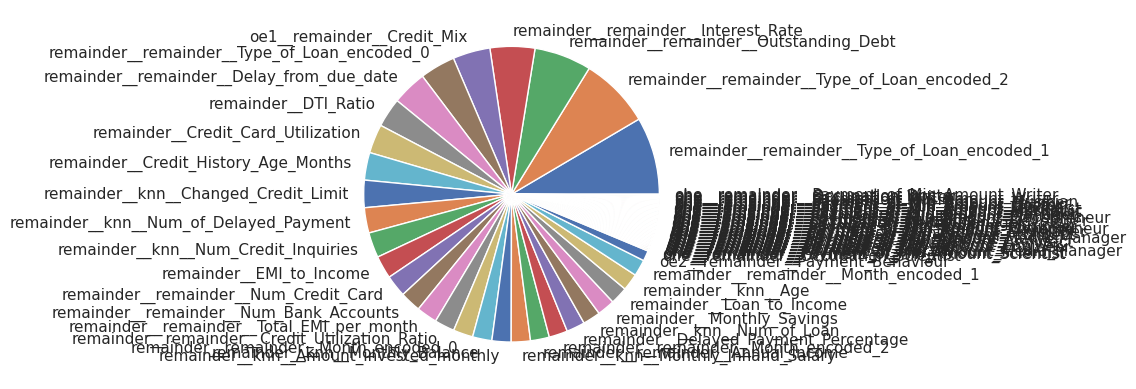

In [133]:
feature_importance.plot(kind='pie')

In [134]:
feature_importance.to_csv('feature_importance.csv')

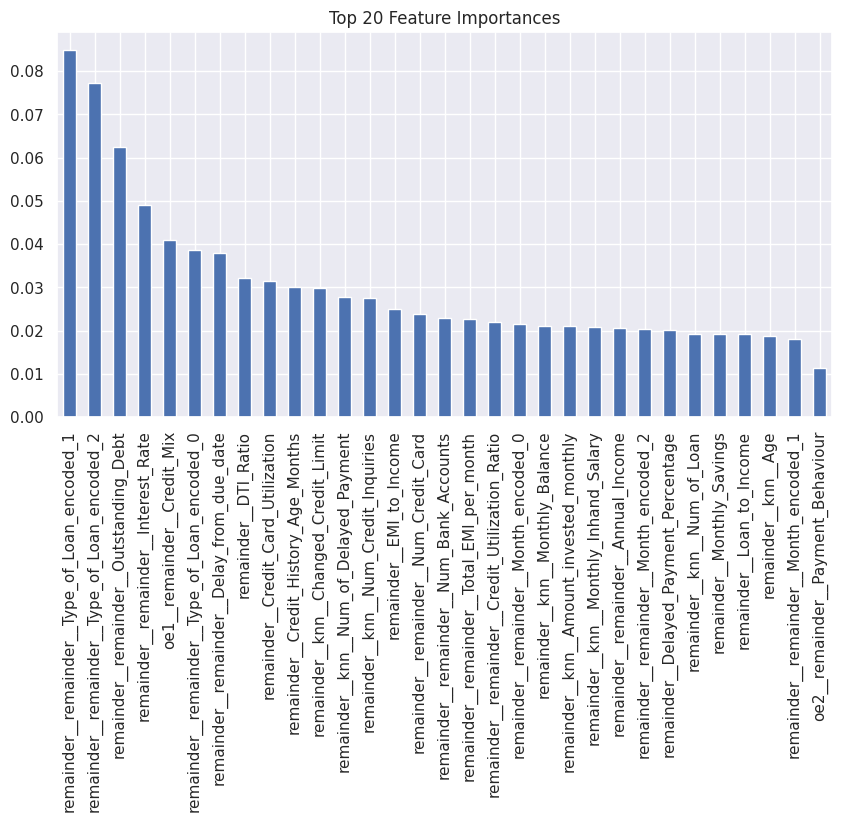

In [135]:
feature_importance.sort_values(ascending=False).head(31).plot(kind='bar', figsize=(10,5))
plt.title("Top 20 Feature Importances")
plt.show()

# Model Building

In [136]:
# Sort features by importance (assuming it's stored in a Pandas Series)
top_features = feature_importance.sort_values(ascending=False).head(31).index

# Select only these features from your dataset
X_selected = train_trf[top_features]

In [137]:
from sklearn.model_selection import train_test_split

In [175]:
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.3,random_state=365)

In [176]:
y_test.shape

(30000,)

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
scale = MinMaxScaler()

In [141]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [142]:
# Train the model with selected features
model.fit(x_train_scaled, y_train)

# Evaluate model performance


RandomForestClassifier(random_state=42)

In [143]:
y_pred = model.predict(x_test_scaled)

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_test,y_pred)

0.7979333333333334

In [146]:
from sklearn.ensemble import VotingClassifier , BaggingClassifier , StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score ,KFold

## Trying Different Algos

In [147]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model1, X_selected, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-validation Accuracy scores:", cv_scores)
print(f"Mean Accuracy Score: {cv_scores.mean():.4f}")
print(f"Standard deviation of Accuracy scores: {cv_scores.std():.4f}")

Cross-validation Accuracy scores: [0.7984  0.80035 0.7996  0.79895 0.7979 ]
Mean Accuracy Score: 0.7990
Standard deviation of Accuracy scores: 0.0009


In [148]:
dtc = DecisionTreeClassifier(max_depth=15, min_samples_split=4)
dtc.fit(x_train_scaled,y_train)
y_pred1 = dtc.predict(x_test_scaled)
accuracy_score(y_test,y_pred1)

0.7337333333333333

In [149]:
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train_scaled,y_train)
y_pred2 = gbc.predict(x_test_scaled)
accuracy_score(y_test,y_pred2)

0.7533

In [150]:
estimators=[('rf', model), ('dt', dtc), ('gbc', gbc)]

In [151]:
vc = VotingClassifier(estimators,voting='soft')

In [152]:
vc.fit(x_train_scaled,y_train)
y_pred_vc = vc.predict(x_test_scaled)
accuracy_score(y_test,y_pred_vc)

0.7664333333333333

## Deep Learning Model

In [153]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [154]:
x_train_scaled.shape

(70000, 31)

In [155]:
model = Sequential([
    Dense(512, activation='relu',input_shape=(31,)),

    Dense(512, activation='relu'),


    Dense(256, activation='relu'),



    Dense(256, activation='relu'),



    Dense(128, activation='relu'),



    Dense(64, activation='relu'),



    Dense(64, activation='relu'),



    Dense(32, activation='relu'),


    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [156]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 523,651 (2.00 MB)

 Trainable params: 523,651 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [158]:
model.fit(x_train_scaled,y_train,epochs=25,validation_split=0.2)


Epoch 1/25
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.6990 - loss: 0.6873 - val_accuracy: 0.7413 - val_loss: 0.5908
Epoch 2/25
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7363 - loss: 0.5987 - val_accuracy: 0.7403 - val_loss: 0.5956
Epoch 3/25
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7438 - loss: 0.5829 - val_accuracy: 0.7390 - val_loss: 0.5981
Epoch 4/25
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.7454 - loss: 0.5809 - val_accuracy: 0.7509 - val_loss: 0.5718
Epoch 5/25
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7465 - loss: 0.5716 - val_accuracy: 0.7465 - val_loss: 0.5770
Epoch 6/25
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7466 - loss: 0.5710 - val_accuracy: 0.7514 - val_loss: 0.5724
Epoch 7/25
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7500 - loss: 0.5658 - val_accuracy: 0.7502 - val_loss: 0.5709
Epoch 8/25
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.7515 -

In [159]:
y_pred_dl = model.predict(x_test_scaled)


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [160]:
y_pred_final = y_pred_dl.argmax(axis=1)

In [161]:
accuracy_score(y_test,y_pred_final)


0.753

## HyperParameter Tuning

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
rf = RandomForestClassifier()

In [164]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Parameter grid for DecisionTree
param_grid_dtc = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Parameter grid for GradientBoosting
param_grid_gbc = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.7, 0.8, 1.0]
}

# Parameter grid for Neural Network
param_grid_nn = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

In [165]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV, train_test_split

# Use only 20% of data for hyperparameter tuning
x_train_small, _, y_train_small, _ = train_test_split(x_train_scaled, y_train, test_size=0.8, random_state=42)

# Random Forest (FASTEST OPTIMIZATION)
grid_search_rf = HalvingRandomSearchCV(estimator=rf, param_distributions=param_grid_rf,
                                       factor=3, scoring='accuracy', n_jobs=-1, cv=2)
grid_search_rf.fit(x_train_small, y_train_small)

# Decision Tree (FASTEST OPTIMIZATION)
grid_search_dtc = HalvingRandomSearchCV(estimator=dtc, param_distributions=param_grid_dtc,
                                        factor=3, scoring='accuracy', n_jobs=-1, cv=2)
grid_search_dtc.fit(x_train_small, y_train_small)

# Gradient Boosting (FASTEST OPTIMIZATION)
grid_search_gbc = HalvingRandomSearchCV(estimator=gbc, param_distributions=param_grid_gbc,
                                        factor=3, scoring='accuracy', n_jobs=-1, cv=2)
grid_search_gbc.fit(x_train_small, y_train_small)

# Print best parameters
print("Best Parameters for RandomForest:", grid_search_rf.best_params_)
print("Best Parameters for DecisionTree:", grid_search_dtc.best_params_)
print("Best Parameters for GradientBoosting:", grid_search_gbc.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 648 is smaller than n_iter=1166. Running 648 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 72 is smaller than n_iter=1166. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 81 is smaller than n_iter=1166. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Parameters for DecisionTree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy'}
Best Parameters for GradientBoosting: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}


In [166]:
rf_best = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
rf_best.fit(x_train_scaled, y_train)

dtc_best = DecisionTreeClassifier(**grid_search_dtc.best_params_, random_state=42)
dtc_best.fit(x_train_scaled, y_train)

gbc_best = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)
gbc_best.fit(x_train_scaled, y_train)


GradientBoostingClassifier(max_depth=10, n_estimators=200, random_state=42,
                           subsample=0.8)

In [167]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf_best.predict(x_test_scaled)
y_pred_dtc = dtc_best.predict(x_test_scaled)
y_pred_gbc = gbc_best.predict(x_test_scaled)

print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("DecisionTree Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("GradientBoosting Accuracy:", accuracy_score(y_test, y_pred_gbc))


RandomForest Accuracy: 0.7989
DecisionTree Accuracy: 0.7087
GradientBoosting Accuracy: 0.8064


##  On Test Data

rf_best / dtc_best / gbc_best

In [186]:
# predict results
results = gbc_best.predict(test_trf[top_features])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
